# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import seaborn as sns

# Import API key
#import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#lat_lng_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #lat_lng_list.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

581

In [3]:
#Create dataframe with list of cities
#df = pd.DataFrame(cities)
#df = df.rename(columns={0: 'city'})
#Add lat and lngs to dataframe, create separate columns for lats and longs
#df['lat_lngs'] = lat_lng_list
#df['lat'] = df.lat_lngs.map(lambda x: str(x[0]))
#df['long'] = df.lat_lngs.map(lambda x: str(x[1]))
#df['temp'] = df.lat_lngs.map(lambda x: str(x[1]))
#df['max_temp'] = df.lat_lngs.map(lambda x: str(x[1]))
#df['humidity'] = df.lat_lngs.map(lambda x: str(x[1]))
#df.head()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#api_key = "e8f38ae7533674593d5d62f0acd18d06"
#Define df
#df = pd.DataFrame(cities)
#df = df.rename(columns={0: 'city'})
#Create new columns for data we'll be collecting from the API
#df['temp'] = ""
#df['max_temp'] = ""
#df['humidity'] = ""
#df['wind_speed'] = ""
#df['clouds'] = ""
#Creating Counters
record_count = 1
set_count = 1
city_data = []
#Iterate over each row
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#index, row in df.iterrows():
    #city = row['city']
    print("Processing Record %s of set %s | %s" %(record_count, set_count, city))
    record_count += 1
    #city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&q=" + city
    #print(url)
    try:
        weather = requests.get(url).json()
        city_temp = weather['main']['temp']
        lat = weather['coord']['lat']
        lon = weather['coord']['lon']
        country = weather['sys']['country']
        date = weather['dt']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_wind_speed = weather['wind']['speed']
        city_clouds = weather['clouds']['all']
        
        #Append city into city_info
        city_data.append({"City": city,
                      "Temperature" : city_max_temp,
                      "Humidity" : city_humidity,
                      "Longitude" : lon,
                      "Latitude" : lat,
                      "Cloudiness" : city_clouds,
                      "Country" : country,
                      "Windspeed" : city_wind_speed,
                      "Date" : date
                      })
        
    except:
        print('city not found.Skipping...')
        pass
    
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 of set 1 | pinheiro machado
Processing Record 2 of set 1 | montrose
Processing Record 3 of set 1 | pevek
Processing Record 4 of set 1 | uusikaupunki
Processing Record 5 of set 1 | dudinka
Processing Record 6 of set 1 | touros
Processing Record 7 of set 1 | mataura
Processing Record 8 of set 1 | severo-kurilsk
Processing Record 9 of set 1 | saint-pierre
Processing Record 10 of set 1 | terre haute
Processing Record 11 of set 1 | umzimvubu
city not found.Skipping...
Processing Record 12 of set 1 | upernavik
Processing Record 13 of set 1 | sidi ali
Processing Record 14 of set 1 | kapaa
Processing Record 15 of set 1 | butaritari
Processing Record 16 of set 1 | rawson
Processing Record 17 of set 1 | natal
Processing Record 18 of set 1 | libreville
Processing Record 19 of set 1 | hithadhoo
Processing Record 20 of set 1 | alofi
Processing Record 21 of set 1 | eydhafushi
Processing Record 22 of set 1 | punta arenas
Processing Record 23 of set 1 | batetskiy
Processing Record 

In [7]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Windspeed
0,pinheiro machado,90,BR,1564251066,84,-31.58,-53.38,283.71,2.98
1,montrose,90,GB,1564251067,93,56.71,-2.47,291.15,5.10
2,pevek,100,RU,1564250886,98,69.70,170.27,273.70,2.67
3,uusikaupunki,0,FI,1564251067,42,60.80,21.41,301.15,2.10
4,dudinka,40,RU,1564251067,87,69.41,86.18,280.15,5.00


In [14]:
#Extract relevant fields from DataFrame
lat = city_data_pd["Latitude"]
city_max_temps = city_data_pd["Temperature"]
city_humidity = city_data_pd["Humidity"]
city_clouds = city_data_pd["Cloudiness"]
city_wind_speed = city_data_pd["Windspeed"]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Export dataframe to CSV
city_data_pd.to_csv("cities.csv", encoding="utf-8", index=False)
city_data_pd.round()
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Windspeed
0,pinheiro machado,90,BR,1564251066,84,-31.58,-53.38,283.71,2.98
1,montrose,90,GB,1564251067,93,56.71,-2.47,291.15,5.10
2,pevek,100,RU,1564250886,98,69.70,170.27,273.70,2.67
3,uusikaupunki,0,FI,1564251067,42,60.80,21.41,301.15,2.10
4,dudinka,40,RU,1564251067,87,69.41,86.18,280.15,5.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

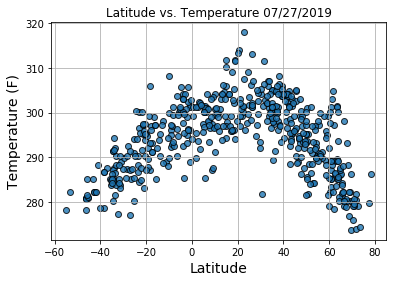

In [19]:
#Pull in today's date for graphs
#date = datetime.date.today()
#lat = df['lat']
#temp = df['temp']
#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

#sns.set()
#plt.figure(figsize=(10,8))
plt.scatter(lat, city_max_temps,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
plt.title(f"Latitude vs. Temperature {date}", fontsize="12")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Temperature (F)", fontsize="14")
plt.grid(True)
#plt.ylim(0, 120)

plt.savefig("Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

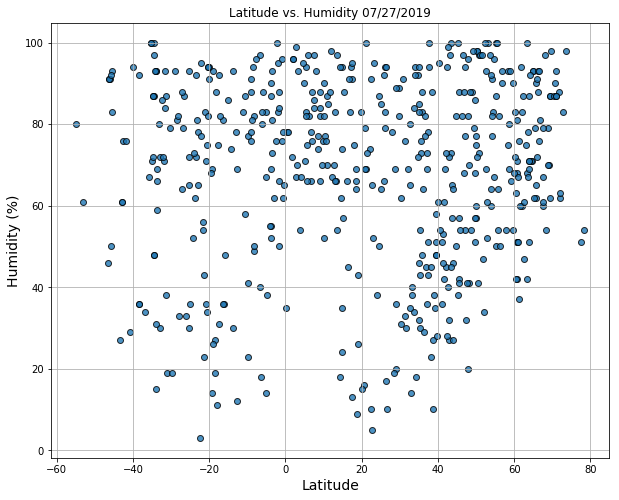

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(lat, city_humidity,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")                              
plt.title(f"Latitude vs. Humidity {date}", fontsize="12")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Humidity (%)", fontsize="14")
plt.grid(True)
#plt.ylim(0,120)

plt.savefig("Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

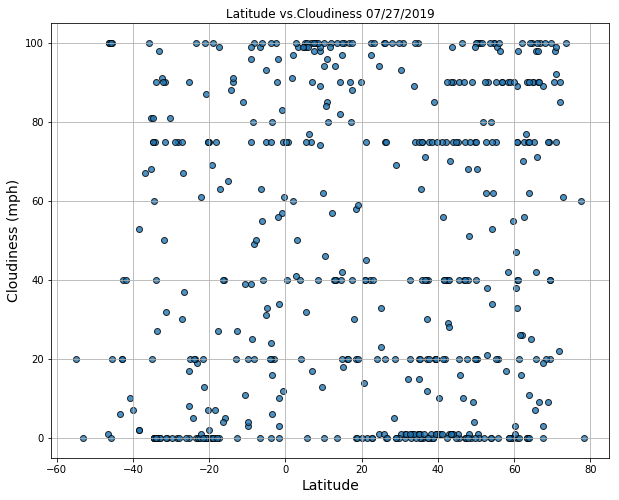

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(lat, city_clouds,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")                          
plt.title(f"Latitude vs.Cloudiness {date}", fontsize="12")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Cloudiness (mph)", fontsize="14")
plt.grid(True)
#plt.ylim(-20, 120)

plt.savefig("Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

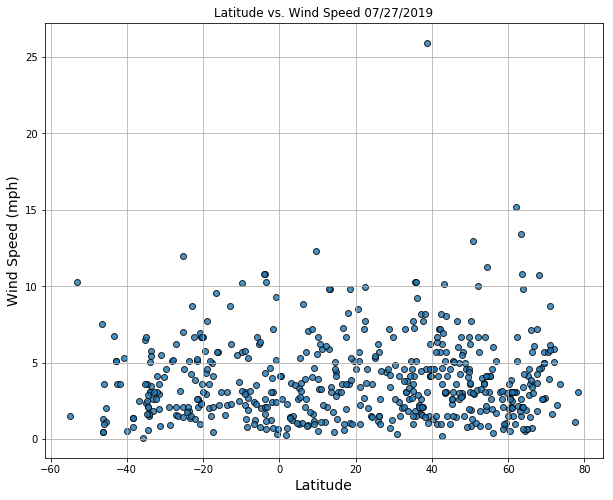

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(lat, city_wind_speed,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")                             
plt.title(f"Latitude vs. Wind Speed {date}", fontsize="12")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")
plt.grid(True)
#plt.ylim(-5,45)

plt.savefig("Wind_Speed.png")

plt.show()

In [33]:
#Save the plotted figures as .pngs
#DONE. All plotted figures have been saved